<Figure size 4000x6000 with 0 Axes>

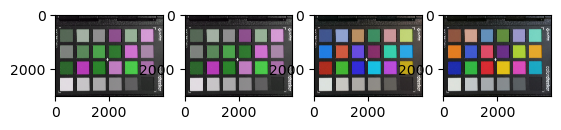

In [28]:
import cv2, numpy as np, matplotlib.pyplot as plt
img =cv2.imread('GRBG.png')

#Для выполнения работы с помощью программного кода должна быть создана функция выполняющая дебайеризацию.
def debayering(image,bayer_filter,alg):
    if len(image.shape)==3: image = image[:,:,0].astype(int) # Удаление лишних каналов, т.к изображение чёрно белое
    r,g,b = [],[],[] # списки с пикселями каждого цвета

    if alg=='SuperPixel':
        # Считывание групп по 4 пикселя
        groups = []
        groups.append(image[::2,::2]) # 1 пиксель каждой группы
        groups.append(image[1::2,::2]) # 2 пиксель каждой группы, и т.д.
        groups.append(image[::2,1::2])
        groups.append(image[1::2,1::2])
        d_image = np.zeros(shape = (*groups[0].shape, 3)) # Создаётся новое изображение с 3 цветовыми каналами
        
        for i, v in enumerate(bayer_filter):
            if v=='R':r.append(groups[i])
            if v=='G':g.append(groups[i])
            if v=='B':b.append(groups[i])
        
        d_image[:,:,0] = np.average(r, axis=0) # берётся среднее значение списка (для цвета которого два в фильтре в данном случае зелёного)
        d_image[:,:,1] = np.average(g, axis=0)
        d_image[:,:,2] = np.average(b, axis=0)
        return np.repeat(np.repeat(d_image.astype(np.uint8), 2, axis=0), 2, axis=1) # увеличение разрешения до размера ColorChecker.png методом ближайшего соседа
    
    if alg=='Билинейная интерполяция':
        res = np.zeros(shape = (*image.shape, 3), dtype=int) # Создаётся новое изображение с 3 цветовыми каналами
        for y in range(0,len(image)-1):
            for x in range(0,len(image[0])-1):
                try:
                    if bayer_filter != 'GRBG': xr=x-1
                    else: xr=x
                    if bayer_filter == 'GBRG': yr=y-1
                    else: yr=y
                    if xr%2==0 and yr%2==1: # красный канал
                        res[y,x,0] = image[y,x] # сам канал - значение пикселя
                        res[y,x,1] = (image[y,x+1] + image[y,x-1] + image[y+1,x] + image[y-1,x])/4 # другие каналы - соседние пиксели
                        res[y,x,2] = (image[y+1,x+1] + image[y+1,x-1] + image[y-1,x+1] + image[y-1,x-1])/4
                    elif (xr%2==0 and yr%2==0):
                        res[y,x,2] = (image[y,x+1] + image[y,x-1])/2
                        res[y,x,1] = image[y,x]
                        res[y,x,0] = (image[y+1,x] + image[y-1,x])/2
                    elif (xr%2==1 and yr%2==1): # зелёный канал
                        res[y,x,0] = (image[y,x+1] + image[y,x-1])/2
                        res[y,x,1] = image[y,x]
                        res[y,x,2] = (image[y+1,x] + image[y-1,x])/2
                    elif xr%2==1 and yr%2==0: # синий канал
                        res[y,x,0] = (image[y+1,x+1] + image[y+1,x-1] + image[y-1,x+1] + image[y-1,x-1])/4
                        res[y,x,1] = (image[y,x+1] + image[y,x-1] + image[y+1,x] + image[y-1,x])/4
                        res[y,x,2] = image[y,x]
                    else: print('?')
                except [IndexError, ValueError]: pass
        return res.astype(np.uint8)

        
reference = cv2.cvtColor(cv2.imread('ColorChecker.png'), cv2.COLOR_BGR2RGB)
SuperPixel1 = debayering(img.copy(),'RGGB','SuperPixel')
SuperPixel2 = debayering(img.copy(),'BGGR','SuperPixel')
SuperPixel3 = debayering(img.copy(),'GBRG','SuperPixel')
SuperPixel4 = debayering(img.copy(),'GRBG','SuperPixel')
plt.figure(figsize = (40,60))
a, b = plt.subplots(1,4)
b[0].imshow(SuperPixel1)
b[1].imshow(SuperPixel2)
b[2].imshow(SuperPixel3)
b[3].imshow(SuperPixel4)

<Figure size 4000x6000 with 0 Axes>

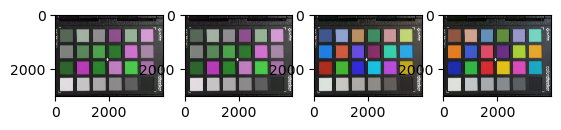

In [29]:
Bilinear1 = debayering(img.copy(), 'RGGB', 'Билинейная интерполяция')
Bilinear2 = debayering(img.copy(), 'BGGR', 'Билинейная интерполяция')
Bilinear3 = debayering(img.copy(), 'GBRG', 'Билинейная интерполяция')
Bilinear4 = debayering(img.copy(), 'GRBG', 'Билинейная интерполяция')
plt.figure(figsize = (40,60))
a, b = plt.subplots(1,4)
b[0].imshow(Bilinear1)
b[1].imshow(Bilinear2)
b[2].imshow(Bilinear3)
b[3].imshow(Bilinear4)
# cv2.imwrite('Bilinear.png', cv2.cvtColor(Bilinear, cv2.COLOR_RGB2BGR))

In [30]:
#b2 = Bilinear.copy()
#b2[:,:,0], b2[:,:,1] = b2[:,:,1], b2[:,:,0]
#plt.imshow(b2)